In [1]:
import pandas as pd, seaborn as sns
input_train = pd.read_csv('../data/stock/05_model_input/x_train_stock.csv')
output_train = pd.read_csv('../data/stock/05_model_input/y_train_stock.csv')

# input_train = input_train[:1000]
# output_train = output_train[:1000]

data = pd.concat([input_train, output_train['reod']], axis=1)
target = pd.get_dummies(data['reod'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target,test_size=0.2, random_state=0, shuffle=True, stratify=target)

In [2]:
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed
seed(1)
set_seed(2)

In [5]:
import seaborn as sns, keras
import matplotlib.pyplot as plt

def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        metrics(str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

In [9]:
def build_model(activation_name='relu'):
    inputs = keras.Input(shape=x_train.shape[1])
    hidden_layer = keras.layers.Dense(20, activation=activation_name)(inputs)
    output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)
    model = keras.Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 10, epochs = 100, verbose=0)
    plot_history(history, 'val_loss')

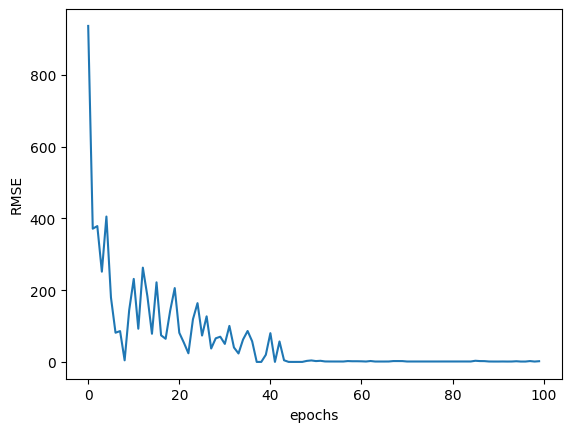

In [5]:
# for activation_name in ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential']:
build_model('relu')

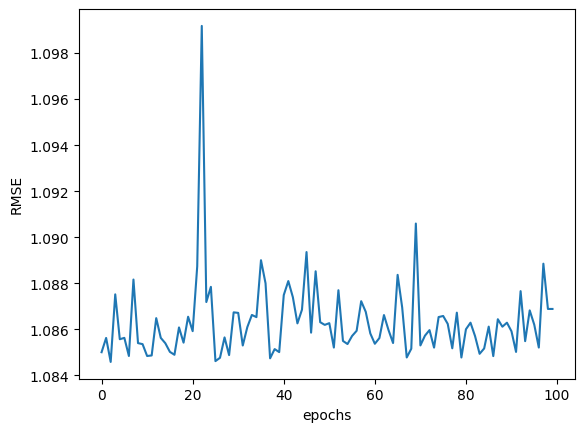

In [6]:
build_model('sigmoid')

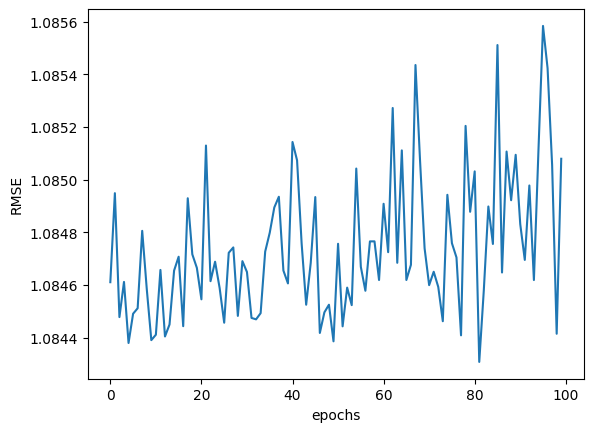

In [6]:
build_model('softmax')

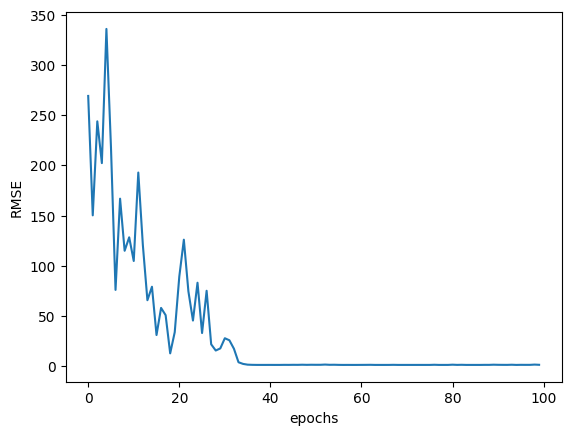

In [7]:
build_model('softplus')

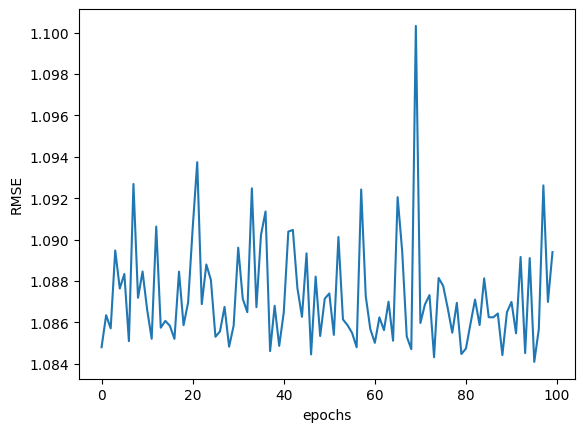

In [8]:
build_model('softsign')

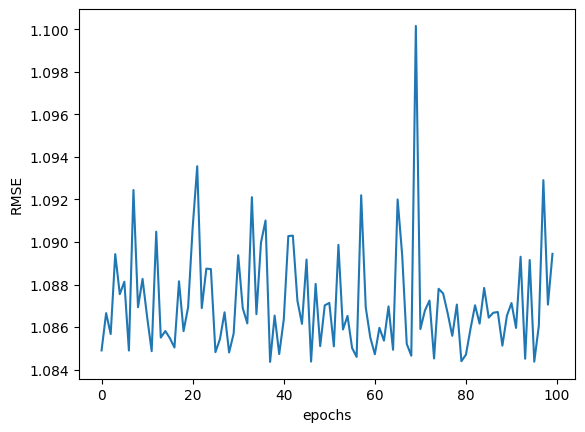

In [9]:
build_model('tanh')

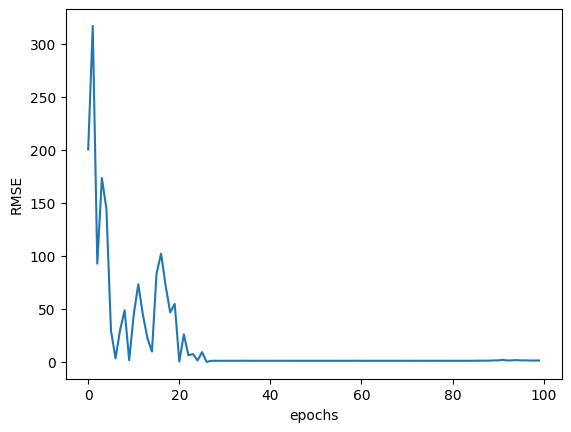

In [10]:
build_model('selu')

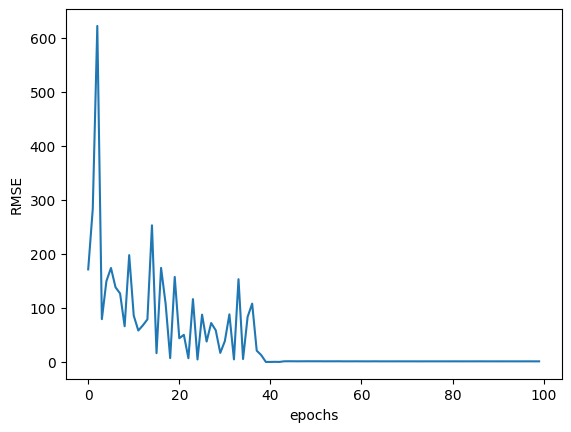

In [6]:
build_model('elu')

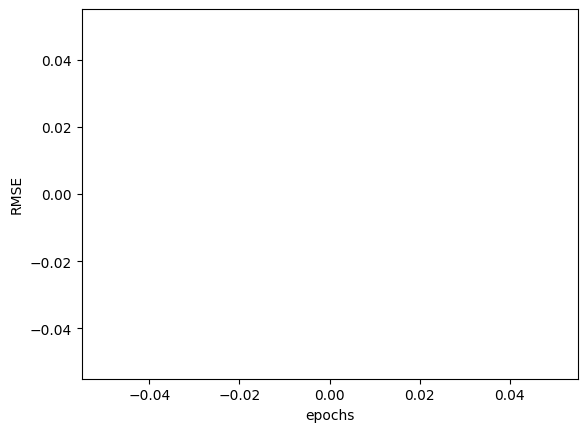

In [8]:
build_model('exponential')

In [ ]:
y_pred = model.predict(x_test)
prediction = pd.DataFrame(y_pred, columns=target.columns)
print(prediction.head())
print(y_test.head())
result = pd.concat([prediction, y_test], axis=1)
print(result.head(10))
# from sklearn.metrics import accuracy_score
# score = accuracy_score(y_test[target_field].values.tolist(), y_predict[target_field].values.tolist())
# print(score)

NameError: name 'model' is not defined